# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

import numpy as np

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')

### Step 4. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [4]:
top_5_items_bought = (chipo.groupby('item_name')[['quantity']].sum()
                                                              .sort_values('quantity', ascending=False)
                                                              .iloc[:5,]
                                                              .sort_values('quantity'))
top_5_items_bought

,quantity
item_name,
Canned Soft Drink,351
Steak Burrito,386
Chips and Guacamole,506
Chicken Burrito,591
Chicken Bowl,761


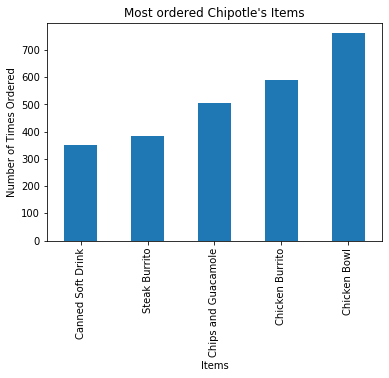

In [5]:
ax = top_5_items_bought.plot(legend=False, kind='bar')
ax.set_title('Most ordered Chipotle\'s Items')
ax.set_xlabel('Items')
ax.set_ylabel('Number of Times Ordered');

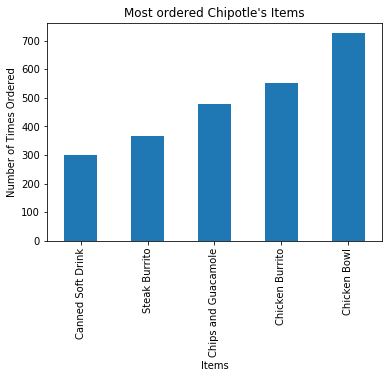

In [17]:
# Original solution:

# get the Series of the names
x = chipo.item_name

# use the Counter class from collections to create a dictionary with keys(text) and frequency
letter_counts = Counter(x)

# convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(letter_counts, orient='index')

# sort the values from the top to the least value and slice the first 5 items
df = df[0].sort_values(ascending = True)[45:50]

# create the plot
df.plot(kind='bar')

# Set the title and labels
plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items')

# show the plot
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [6]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:-1]))

In [7]:
chipo.head(3)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39


In [8]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


In [9]:
ordered_per_price = chipo.groupby('order_id').sum()
ordered_per_price.head()

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70


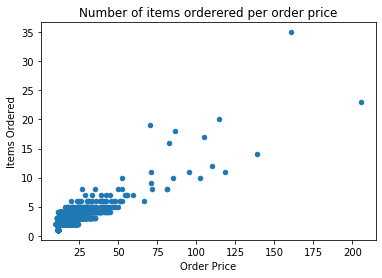

In [10]:
ax = ordered_per_price.plot(x='item_price', y='quantity', kind='scatter')
ax.set_title('Number of items orderered per order price')
ax.set_xlabel('Order Price')
ax.set_ylabel('Items Ordered');

In [22]:
# Original solution:

# # create a list of prices
# chipo.item_price = [float(value[1:-1]) for value in chipo.item_price] # strip the dollar sign and trailing space

# # then groupby the orders and sum
# orders = chipo.groupby('order_id').sum()

# # creates the scatterplot
# # plt.scatter(orders.quantity, orders.item_price, s = 50, c = 'green')
# plt.scatter(x = orders.item_price, y = orders.quantity, s = 50, c = 'green')

# # Set the title and labels
# plt.xlabel('Order Price')
# plt.ylabel('Items ordered')
# plt.title('Number of items ordered per order price')
# plt.ylim(0)

### Step 7. BONUS: Create a question and a graph to answer your own question.

In [11]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


### Does having "Chicken Bowl" in order correlates with order price?

In [12]:
# Get prices for every order
order_price = chipo.groupby('order_id')[['item_price']].sum()
order_price.head(3)

,item_price
order_id,
1,11.56
2,16.98
3,12.67


In [13]:
# Get 'Chicken Bowl' appearings in every order
chicken_bowl = chipo.groupby('order_id')[['item_name']].agg(list)

chicken_bowl = chicken_bowl['item_name'].apply(lambda x: 'Chicken Bowl' in x)
chicken_bowl.name = 'have_chicken_bowl'
chicken_bowl.head()

order_id
1    False
2     True
3     True
4    False
5    False
Name: have_chicken_bowl, dtype: bool

In [14]:
# Join them into one dataframe 
order_price_chicken_bowl = pd.concat([order_price, chicken_bowl], axis=1)
order_price_chicken_bowl.head()

,item_price,have_chicken_bowl
order_id,,
1,11.56,False
2,16.98,True
3,12.67,True
4,21.00,False
5,13.70,False


In [15]:
# Get total prices
order_price_chicken_bowl_total = order_price_chicken_bowl.groupby('have_chicken_bowl').sum()
order_price_chicken_bowl_total.rename(columns = {'item_price': 'total_price'}, inplace=True)
order_price_chicken_bowl_total

,total_price
have_chicken_bowl,
False,21684.98
True,12815.18


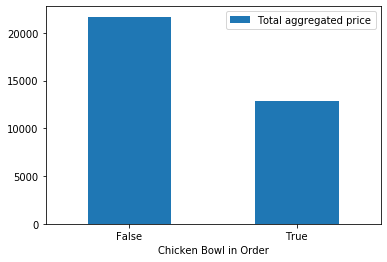

In [16]:
# Graph data
ax = order_price_chicken_bowl_total.plot(kind='bar')
ax.xaxis.set_tick_params(rotation=0)
ax.set_xlabel('Chicken Bowl in Order')
ax.legend(['Total aggregated price']);
ax.set_title('');